# Eigenvalue problems

Let's have a look at Julia eigenvalue problem capabilities. Let's look at an eigenvalue problem of the form 
$$
A \,{\underline x}_i = \lambda_i\, {\underline x}_i,
$$
where $A$ is a matrix.

In [1]:
using LinearAlgebra, Plots

In [2]:
A = [1. 2. 3.; 4. 5. 6.; 3. 2. 2.]
lambda, vec = eigen( A )

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
3-element Array{Float64,1}:
 -1.4797264327289552
  0.21892287918940798
  9.260803553539533
vectors:
3×3 Array{Float64,2}:
 -0.6557     0.266735  -0.345532
 -0.253703  -0.832515  -0.858376
  0.711121   0.485563  -0.379207

Let's test the eigenvalues and eigenvectors to see if they are accurate.

In [3]:
for i in eachindex(lambda)
    println( norm( A * vec[:,i] - lambda[i] * vec[:,i] ) )
end

3.967397163063965e-15
4.309203957205833e-15
1.2623387138745463e-14


That looks pretty good. What about a generalised eigenvalue problem of the form
$$
A \,{\underline x}_i = \lambda_i\, B {\underline x}_i,
$$
where $A$ and $B$ are both matrices.

In [10]:
A = rand(4,4)
B = rand(4,4)
vals, vecs = eigen( A, B );

In [5]:
for i in eachindex(vals)
    println( norm( A * vecs[:,i] - vals[i] * B * vecs[:,i] ) )
end

7.037420587112708e-16
7.758229539460797e-16
9.887375990478772e-16
1.1140328793007568e-15


## Harmonic equation

Let's solve the harmonic equation 
$$
f''(x) + \lambda f(x) = 0,
$$
as an eigenvalue problem for $\lambda$ for $x \in [0,1]$ with the boundary conditions $f(0)=f(1)=0$. We will use second-order finite differences to solve the equation for the eigenvalues $\lambda_n$ which should be of the form $\lambda_n = n^2 \pi^2$ as the number of nodal points in the finite difference approximation tends towards infinity.

In [8]:
N = 100                          # Number of nodal points
delta = 1. / ( N - 1 )
# Finite-difference f''(x)
A = ( zeros( N, N ) + I ) * -2.0 / delta^2
for i in 1:N-1
    A[ i, i + 1 ] = 1.0 / delta^2
    A[ N + 1 - i, N - i ] = 1.0 / delta^2
end
# Overwrite with boundary conditions
A[ 1, 1 ] = 1.0
A[ 1, 2 ] = 0.0
A[ N, N ] = 1.0
A[ N, N - 1] = 0.0
# Right hand side is - lambda * f
B = ( zeros( N, N) - I )
B[ 1, 1 ] = 0.0
B[ N, N ] = 0.0
# Determine the eigenvalues (only)
lambdas = eigvals( A, B )
# The first eigenvalue should be pi^2 so let's check it
error = abs( lambdas[1] - pi^2 )
println( "For N = ", N, " the error in the 1st eigenvalue is ", error )

For N = 100 the error in the 1st eigenvalue is 0.0008281962822245248


Let's plot the first few numerically calculated eigenvalues along with the exact eigenvalues. 

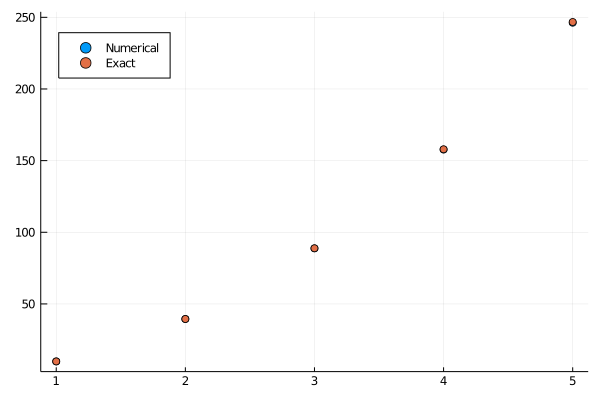

In [9]:
k = 5
lambdas = lambdas[1:k]
exact = zeros( k )
for n in eachindex(lambdas)
    exact[n] = n^2 * pi^2
end
scatter( lambdas, label="Numerical", legend=:topleft )
scatter!( exact, label="Exact" )